In [1]:
# Procesamiento de datos
import numpy as np
import pandas as pd
from sklearn import utils
from sklearn import preprocessing as prp
import shap
import optuna
import matplotlib.pyplot as plt

# Modelos
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

# Graficadores
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#Otros
# !pip install category_encoders
from category_encoders import TargetEncoder
# !pip install scikeras
from scikeras.wrappers import KerasClassifier

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
df = pd.read_csv("cefalometria_pva.csv")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,168.0,16.601190,6.017081,9.0,13.00,15.00,18.0,43.0
ANB,168.0,4.633929,2.605541,-7.0,3.00,5.00,6.0,11.0
ICS_SN,168.0,107.113095,9.064919,62.0,102.00,107.00,112.0,141.0
ICS_plan_pal,168.0,64.851190,8.597897,33.0,60.00,65.00,70.0,93.0
IMPA,168.0,96.095238,7.291401,78.0,91.00,96.00,101.0,113.0
Interincisal,168.0,119.976190,11.850340,76.0,113.00,119.00,127.0,165.0
Lab_sup_Lin_e,168.0,-0.776786,2.157537,-6.0,-2.00,-1.00,1.0,6.0
Lab_inf_Lin_e,168.0,0.660714,2.493297,-5.0,-1.00,0.25,2.0,9.0
Nasolabial,168.0,97.476190,10.836815,72.0,89.00,97.00,105.0,130.0
Overjet,168.0,3.732143,2.559410,-3.0,2.00,3.50,5.0,12.0


In [3]:
df['edad'] = df['edad'] / 43
df['ANB'] = df['ANB'] / 11
df['ICS_SN'] = df['ICS_SN'] / 141
df['ICS_plan_pal'] = df['ICS_plan_pal'] / 93
df['IMPA'] = df['IMPA'] / 113
df['Interincisal'] = df['Interincisal'] / 165
df['Lab_sup_Lin_e'] = df['Lab_sup_Lin_e'] / 6
df['Lab_inf_Lin_e'] = df['Lab_inf_Lin_e'] / 9
df['Nasolabial'] = df['Nasolabial'] / 130
df['Overjet'] = df['Overjet'] / 12
df['Oberbite'] = df['Oberbite'] / 10
df['Jarabak_Sum'] = df['Jarabak_Sum'] / 931
df['Angulo_perfil'] = df['Angulo_perfil'] / 182
df['Discre_long_arco'] = df['Discre_long_arco'] / 4
df['Clase_molar'] = df['Clase_molar'] / 2
df['Perfil_labial'] = df['Perfil_labial'] / 4
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,168.0,0.386074,0.139932,0.209302,0.302326,0.348837,0.418605,1.0
ANB,168.0,0.421266,0.236867,-0.636364,0.272727,0.454545,0.545455,1.0
ICS_SN,168.0,0.759667,0.064290,0.439716,0.723404,0.758865,0.794326,1.0
ICS_plan_pal,168.0,0.697325,0.092451,0.354839,0.645161,0.698925,0.752688,1.0
IMPA,168.0,0.850400,0.064526,0.690265,0.805310,0.849558,0.893805,1.0
Interincisal,168.0,0.727128,0.071820,0.460606,0.684848,0.721212,0.769697,1.0
Lab_sup_Lin_e,168.0,-0.129464,0.359590,-1.000000,-0.333333,-0.166667,0.166667,1.0
Lab_inf_Lin_e,168.0,0.073413,0.277033,-0.555556,-0.111111,0.027778,0.222222,1.0
Nasolabial,168.0,0.749817,0.083360,0.553846,0.684615,0.746154,0.807692,1.0
Overjet,168.0,0.311012,0.213284,-0.250000,0.166667,0.291667,0.416667,1.0


In [4]:
df.head()

,edad,genero,ANB,ICS_SN,ICS_plan_pal,IMPA,Interincisal,Lab_sup_Lin_e,Lab_inf_Lin_e,Nasolabial,Overjet,Oberbite,Jarabak_Sum,Angulo_perfil,Discre_long_arco,Clase_molar,Overjet_2,Perfil_labial,label
0,0.720930,M,0.090909,0.751773,0.752688,0.867257,0.769697,-0.333333,0.000000,0.715385,0.333333,0.40,0.421053,0.945055,1.00,0.5,0,0.25,0
1,0.302326,M,0.454545,0.716312,0.752688,0.814159,0.836364,0.333333,0.000000,0.707692,0.250000,0.20,0.421053,0.890110,0.50,0.5,0,0.50,0
2,0.302326,M,0.272727,0.673759,0.752688,0.725664,0.860606,-0.500000,-0.222222,0.800000,0.416667,0.80,0.432868,0.895604,0.50,1.0,1,0.25,0
3,0.279070,F,0.681818,0.673759,0.870968,0.787611,0.854545,0.000000,0.000000,0.730769,0.291667,0.50,0.426423,0.906593,0.50,1.0,0,0.25,0
4,0.325581,F,0.454545,0.808511,0.645161,0.929204,0.696970,-0.166667,-0.055556,0.700000,0.250000,0.15,0.415682,0.923077,0.25,0.5,0,0.25,0


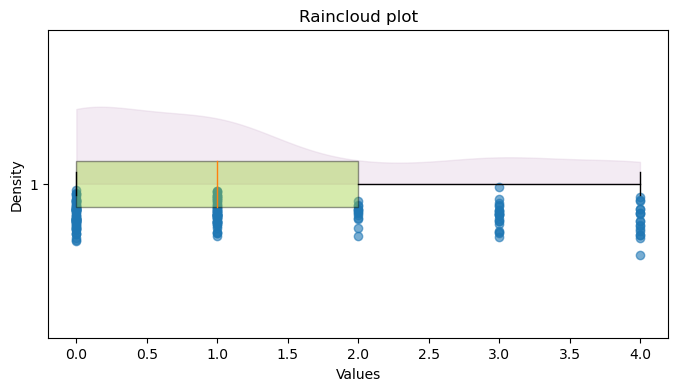

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
data_x = df['label']

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid']

# Violinplot data
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Crear scatter plot horizontal
scatter_data = data_x
y = np.random.normal(1, 0.04, size=len(scatter_data)) - 0.1
plt.scatter(scatter_data, y, alpha=0.6)

# plt.yticks(np.arange(1,1,1), ['Feature 1', 'Feature 2'])  # Set text labels.
plt.xlabel('Values')
plt.ylabel('Density')
plt.title("Raincloud plot")
plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['label'],axis=1),df['label'],test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((117, 18), (51, 18))

In [7]:
# Training
encoder = TargetEncoder(cols=['genero','Clase_molar'])
encoder.fit(x_train,y_train)

#Utiliza el mismo encoder para transformar el dataset de testing y el de testing?
x_train_enc = encoder.transform(x_train)
x_test_enc = encoder.transform(x_test)
print(x_train_enc.info())
x_train_enc.head()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 159 to 102
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              117 non-null    float64
 1   genero            117 non-null    float64
 2   ANB               117 non-null    float64
 3   ICS_SN            117 non-null    float64
 4   ICS_plan_pal      117 non-null    float64
 5   IMPA              117 non-null    float64
 6   Interincisal      117 non-null    float64
 7   Lab_sup_Lin_e     117 non-null    float64
 8   Lab_inf_Lin_e     117 non-null    float64
 9   Nasolabial        117 non-null    float64
 10  Overjet           117 non-null    float64
 11  Oberbite          117 non-null    float64
 12  Jarabak_Sum       117 non-null    float64
 13  Angulo_perfil     117 non-null    float64
 14  Discre_long_arco  117 non-null    float64
 15  Clase_molar       117 non-null    float64
 16  Overjet_2         117 non-null    int64  
 17  

,edad,genero,ANB,ICS_SN,ICS_plan_pal,IMPA,Interincisal,Lab_sup_Lin_e,Lab_inf_Lin_e,Nasolabial,Overjet,Oberbite,Jarabak_Sum,Angulo_perfil,Discre_long_arco,Clase_molar,Overjet_2,Perfil_labial
159,0.279070,1.489372,0.909091,0.822695,0.526882,0.814159,0.624242,0.833333,0.333333,0.653846,1.000000,0.3,0.441461,0.846154,1.0,2.35887,1,1.00
96,0.348837,1.489372,0.545455,0.709220,0.698925,0.840708,0.727273,-0.250000,-0.111111,0.753846,0.166667,0.2,0.437164,0.890110,1.0,0.62321,0,0.25
11,0.348837,1.197758,0.181818,0.744681,0.731183,0.769912,0.806061,-1.000000,-0.333333,1.000000,0.166667,0.2,0.423201,0.928571,0.5,0.62321,0,0.25
67,0.395349,1.197758,0.454545,0.702128,0.720430,0.876106,0.709091,-0.833333,-0.333333,0.946154,0.250000,0.4,0.432868,0.912088,1.0,0.62321,0,0.75
132,0.302326,1.197758,0.636364,0.659574,0.860215,0.814159,0.787879,0.166667,0.388889,0.753846,0.416667,0.2,0.435016,0.868132,1.0,2.35887,1,0.75


In [13]:
import optuna
# Define el modelo dentro de una función que tomará los hiperparámetros como argumentos
def create_model(activation_1, activation_2, activation_3, activation_4, activation_5, activation_6, 
                 init_mode_1, init_mode_2, init_mode_3, init_mode_4, init_mode_5, init_mode_6, regularizer_type):
    
    if regularizer_type == "l1":
        regularizer = keras.regularizers.l1(0.01)
    elif regularizer_type == "l2":
        regularizer = keras.regularizers.l2(0.01)
    else:
        regularizer = None
        
        
    model = keras.Sequential([
        keras.layers.Dense(1024, input_shape=(x_train_enc.shape[1],), activation=activation_1, 
                           kernel_initializer=init_mode_1, kernel_regularizer=regularizer_type),
        keras.layers.Dense(512, activation=activation_2, kernel_initializer=init_mode_2),
        keras.layers.Dense(256, activation=activation_3, kernel_initializer=init_mode_3),
        keras.layers.Dense(128, activation=activation_4, kernel_initializer=init_mode_4),
        keras.layers.Dense(64, activation=activation_5, kernel_initializer=init_mode_5),
        keras.layers.Dense(5, activation=activation_6, kernel_initializer=init_mode_6),
    ])
    model.compile(
        optimizer = tf.keras.optimizers.Adam(),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['Accuracy'])
    return model

# Función objetivo para Optuna
def objective(trial):
    
    regularizer_type = trial.suggest_categorical('regularizer_type', [None, "l1", "l2"])
    
    activations_list = ["elu","exponential","hard_sigmoid","linear", "relu","selu","sigmoid","softmax","softplus",
                                                                                         "softsign","swish","tanh"]
    activation_1 = trial.suggest_categorical('activation_1', activations_list)
    activation_2 = trial.suggest_categorical('activation_2', activations_list)
    activation_3 = trial.suggest_categorical('activation_3', activations_list)
    activation_4 = trial.suggest_categorical('activation_4', activations_list)
    activation_5 = trial.suggest_categorical('activation_5', activations_list)
    activation_6 = trial.suggest_categorical('activation_6', activations_list)
    
    init_list = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    init_mode_1 = trial.suggest_categorical('init_mode_1', init_list)
    init_mode_2 = trial.suggest_categorical('init_mode_2', init_list)
    init_mode_3 = trial.suggest_categorical('init_mode_3', init_list)
    init_mode_4 = trial.suggest_categorical('init_mode_4', init_list)
    init_mode_5 = trial.suggest_categorical('init_mode_5', init_list)
    init_mode_6 = trial.suggest_categorical('init_mode_6', init_list)
              
    model = create_model(activation_1, activation_2, activation_3, activation_4, activation_5, activation_6,
                 init_mode_1, init_mode_2, init_mode_3, init_mode_4, init_mode_5, init_mode_6, regularizer_type)
    history = model.fit(x_train_enc, y_train, epochs=100,  validation_data = (x_test_enc, y_test), verbose=0)
    
    # Usa la pérdida de validación como métrica para optimizar
    val_loss = history.history['val_Accuracy'][-1]
    return val_loss

# Iniciar la optimización con Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Mejores hiperparámetros:", study.best_params)


[I 2023-11-22 11:49:45,419] A new study created in memory with name: no-name-e53a020d-8bac-46a7-bf00-e3e75f7b1ae9
[I 2023-11-22 11:49:55,392] Trial 0 finished with value: 0.3921568691730499 and parameters: {'regularizer_type': 'l1', 'activation_1': 'selu', 'activation_2': 'linear', 'activation_3': 'relu', 'activation_4': 'swish', 'activation_5': 'softmax', 'activation_6': 'softplus', 'init_mode_1': 'lecun_uniform', 'init_mode_2': 'he_uniform', 'init_mode_3': 'normal', 'init_mode_4': 'uniform', 'init_mode_5': 'lecun_uniform', 'init_mode_6': 'glorot_uniform'}. Best is trial 0 with value: 0.3921568691730499.
[I 2023-11-22 11:50:05,642] Trial 1 finished with value: 0.3921568691730499 and parameters: {'regularizer_type': None, 'activation_1': 'softmax', 'activation_2': 'swish', 'activation_3': 'softmax', 'activation_4': 'tanh', 'activation_5': 'sigmoid', 'activation_6': 'sigmoid', 'init_mode_1': 'uniform', 'init_mode_2': 'he_normal', 'init_mode_3': 'he_uniform', 'init_mode_4': 'lecun_unifor

KeyboardInterrupt: 

In [8]:
model = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(x_train_enc.shape[1],), activation='elu', kernel_initializer='he_uniform'),
    keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'),
    keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(128, activation='swish', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(64, activation='sigmoid', kernel_initializer='normal'),
    keras.layers.Dense(5, activation='hard_sigmoid', kernel_initializer='he_normal'),
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['Accuracy'])

callback = EarlyStopping(monitor='val_Accuracy', patience=50, restore_best_weights=True)

model.fit(x_train_enc, y_train, validation_data = (x_test_enc, y_test), epochs = 500, callbacks = [callback])

Epoch 1/500
4/4 [==============================] - 2s 127ms/step - loss: 1.5746 - Accuracy: 0.2991 - val_loss: 1.4029 - val_Accuracy: 0.4510
Epoch 2/500
4/4 [==============================] - 0s 29ms/step - loss: 1.3577 - Accuracy: 0.4359 - val_loss: 1.2017 - val_Accuracy: 0.4314
Epoch 3/500
4/4 [==============================] - 0s 23ms/step - loss: 1.1600 - Accuracy: 0.5299 - val_loss: 1.2393 - val_Accuracy: 0.4706
Epoch 4/500
4/4 [==============================] - 0s 25ms/step - loss: 1.1337 - Accuracy: 0.5641 - val_loss: 1.3643 - val_Accuracy: 0.4314
Epoch 5/500
4/4 [==============================] - 0s 26ms/step - loss: 1.0771 - Accuracy: 0.5128 - val_loss: 1.2731 - val_Accuracy: 0.4510
Epoch 6/500
4/4 [==============================] - 0s 28ms/step - loss: 1.0359 - Accuracy: 0.5641 - val_loss: 1.2070 - val_Accuracy: 0.4706
Epoch 7/500
4/4 [==============================] - 0s 28ms/step - loss: 0.9795 - Accuracy: 0.6667 - val_loss: 1.1311 - val_Accuracy: 0.5294
Epoch 8/500
4/4 [==

4/4 [==============================] - 0s 34ms/step - loss: 0.5960 - Accuracy: 0.7949 - val_loss: 2.4046 - val_Accuracy: 0.5686
Epoch 60/500
4/4 [==============================] - 0s 27ms/step - loss: 0.6038 - Accuracy: 0.7607 - val_loss: 2.4621 - val_Accuracy: 0.5490
Epoch 61/500
4/4 [==============================] - 0s 24ms/step - loss: 0.5726 - Accuracy: 0.7949 - val_loss: 3.2140 - val_Accuracy: 0.5882
Epoch 62/500
4/4 [==============================] - 0s 24ms/step - loss: 0.6985 - Accuracy: 0.8034 - val_loss: 3.4269 - val_Accuracy: 0.5882
Epoch 63/500
4/4 [==============================] - 0s 25ms/step - loss: 0.5475 - Accuracy: 0.7778 - val_loss: 3.0378 - val_Accuracy: 0.5490
Epoch 64/500
4/4 [==============================] - 0s 27ms/step - loss: 0.5535 - Accuracy: 0.7521 - val_loss: 2.8009 - val_Accuracy: 0.5098
Epoch 65/500
4/4 [==============================] - 0s 25ms/step - loss: 0.6638 - Accuracy: 0.7436 - val_loss: 2.7983 - val_Accuracy: 0.5490
Epoch 66/500
4/4 [========

4/4 [==============================] - 0s 25ms/step - loss: 0.7623 - Accuracy: 0.7521 - val_loss: 1.3893 - val_Accuracy: 0.5294
Epoch 118/500
4/4 [==============================] - 0s 24ms/step - loss: 0.7386 - Accuracy: 0.7265 - val_loss: 1.3687 - val_Accuracy: 0.5098
Epoch 119/500
4/4 [==============================] - 0s 25ms/step - loss: 0.7249 - Accuracy: 0.7094 - val_loss: 1.4134 - val_Accuracy: 0.5098
Epoch 120/500
4/4 [==============================] - 0s 23ms/step - loss: 0.7324 - Accuracy: 0.7094 - val_loss: 1.3627 - val_Accuracy: 0.5294
Epoch 121/500
4/4 [==============================] - 0s 23ms/step - loss: 0.7059 - Accuracy: 0.7179 - val_loss: 1.7028 - val_Accuracy: 0.4902
Epoch 122/500
4/4 [==============================] - 0s 41ms/step - loss: 0.6985 - Accuracy: 0.7179 - val_loss: 1.9056 - val_Accuracy: 0.5294
Epoch 123/500
4/4 [==============================] - 0s 32ms/step - loss: 0.6753 - Accuracy: 0.7094 - val_loss: 1.8625 - val_Accuracy: 0.5098
Epoch 124/500
4/4 [=

In [9]:
model.evaluate(x_test_enc, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.4507 - Accuracy: 0.3137


[1.4506808519363403, 0.3137255012989044]

2/2 [==============================] - 0s 6ms/step


Text(50.722222222222214, 0.5, 'Truth')

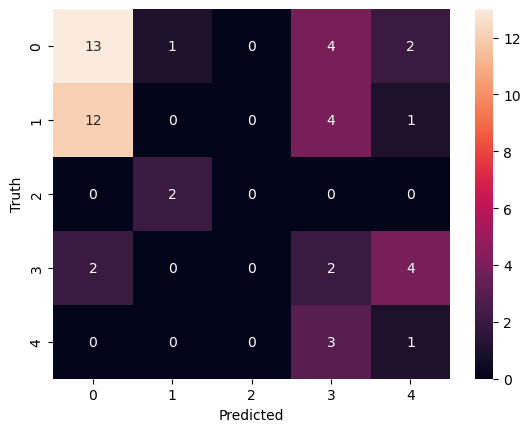

In [10]:
y_pred = model.predict(x_test_enc)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')